In [7]:
%%html
<style>
img[alt=quinientos] {
    width: 500px;
}

img[alt=cuatrocientos] {
    width: 400px;
}
</style>

## Receptor Heterodino

Heterodinar significa mezclar dos frecuencia en una etapa alineal (mezclador) a fin de obtener la suma o diferencia de las dos frecuencias de entrada. Los receptores superheterodinos basan su funcionamiento en la utilización de una o mas etapas mezcladoras, estas trasladan la frecuencia de recepción a un valor de frecuencia normalizado, generalmente menor, denominado Frecuencia Intermedia (FI), para poder mezclar o heterodinar dos señales se debe disponer de una etapa mezcladora y un oscilador local, este último es además el encargado de seleccionar la frecuencia que se desea recibir. 

La idea es convertir todas las frecuencias a recibir a una unica frecuencia  llamada “Frecuencia Intermedia”. 
Esto permite que el receptor pueda recibir distintas frecuencias con un solo demodulador, donde el mayor esfuerzo en filtrado y amplificación en alta frecuencia se hace a la frecuencia intermedia. La sintonía se lleva a cabo modificando la frecuencia del oscilador (oscilador local) y la del filtro de entrada (si el margen de frecuencias a recibir es amplio). 

### Super-heterodino
Un receptor super-heterodino se diferencia de un heterodino común gracias a una serie de mejoras como un amplificador de RF de entrada, un circuito de AGC y otras etapas que optimizan el funcionamiento.

A estos receptores básicamente se los puede clasificar en Receptores de Simple Conversión y Receptores de Doble Conversión. 


### Super-heterodino de simple conversión.

El diagrama en bloques de un receptor de simple conversión se ve a continuación: 


![quinientos](fig/SuperHeterodino1.png)





#### Ejemplo practico : Receptor de radiodifusión AM.


Las frecuencias de la banda de AM comerncial:
$$F_{RF_{min}} = 520 KHz$$  
$$F_{RF_{max}} = 1630 KHz$$  

Para la sintonia de la los distintos canales se emplea un receptor superheteroino de simple conversión, donde la frecuencia $F_{IF} = 455 KHz$ y el ancho de banda del canal es de $\Delta F_{IF} = 10 KHz$, esto ultimo usando un filtro cerámico (SFU455A).


El oscilador local puede tomar cualquiera de las siguientes frecuencias:
$$f_{osc} = f_{RF} + f_{IF}$$ 
$$f_{osc} = f_{RF} - f_{IF}$$


Para este ejemplo, la emplearemos la primer opción: $f_{osc_{min}} = 975 kHz$ y $f_{osc_{min}} = 2085 kHz$.


El siguiente diagrama muestra  como se realiza la recepcion del canal de $f_{RF} = 1MHz$. 

![cuatrocientos](fig/frecuenciasAM.png)



La señal de RF que que proviene de la antena ingresa a la etapa de RF. 
En la etapa de RF, el filtro de RF se encuentra sintonzado a la frecuencia del canal que se desea sintonizar ($f_{RF} = 1 MHz$). Este filtro al estar sintonizado a la frecuencia del canal no atenua el canal deseado. Tambien, la señal es amplificada por el amplificador de RF en esta etapa.  


La señal luego es mezclada con la señal del oscilador local, que debe estar operando a $f_{osc} = 1,455 MHz$. 

El mezclador ideal tiene una respuesta artimetica, de tal forma, la señal de salida se obtiene de la siguiente ecuación: 

$$v_{IF}(t) = K \cdot v_{OL}(t) \cdot v_{RF}(t)$$


Si las señales de entrada son, en el caso más simple, ondas de tensión senoidales, entonces: 

$$v_{IF}(t) = K \cdot cos(\omega_{OL} \cdot t) \cdot cos(\omega_{RF} \cdot t) $$

Para resolver esta ecuacion, podemos emplear la identidad trigonometrica:

$$cos(\alpha) \cdot cos(\beta) = \frac{1}{2} \cdot [cos(\alpha + \beta) +  \cdot cos(\alpha - \beta)  ]$$

Empleando la identidad:

$$v_{IF}(t) = K \cdot \frac{1}{2} \cdot [cos( (\omega_{OL}+ \omega_{RF})  \cdot t) + cos( (\omega_{OL}-\omega_{RF} ) \cdot t) ]$$

En función de la frecuencia, entonces:

$$v_{IF}(t) = K \cdot \frac{1}{2} \cdot [cos( 2 \pi \cdot |f_{OL}+ f_{RF}|  \cdot t) + cos( 2 \pi \cdot |f_{OL}-f_{RF} | \cdot t) ]$$


Como vemos, la señal de salida esta compuesta por dos componentes:

$$|f_{OL}+ f_{RF}| = 1455 KHz + 1000 KHz = 2455 KHz$$

$$|f_{OL}- f_{RF}| = 1455 KHz - 1000 KHz = 455 KHz$$


La salida de un mezclador contiene la suma y la diferencia de las dos frecuencias de entrada, $f_{OL} \pm f_{RF}$.

La componente de mas alta frecuencia ($f_{OL} + f_{RF}$) es atenuada por el filtro de IF. El ancho de banda de la señal resultante esta realcionada con la respuesta del filtro de RF, que por cuestiones constructivas, no tiene la suficiente selectividad como para eliminar los canales adyacentes. Esta selectividad se obtine del filtro de IF. 

Notar que calculamos los modulos de las componentes de las frecuencias. En este caso la respuesta es para la componente positiva. Pero dada la respuesta del mezclador, la frecuencia $f_{RF} = 1910 KHz$ también tiene respuesta en la frecuencia $455KHz$, la cual corresponde a la componente negativa del modulo.  
Esta señal es no deseada y se llama "frecuencia imagen" o $f_{imagen}$, debido a la simetría entre ambas frecuencias detectables respecto a $f_{OL}$. Esta señal a la salida del mezclador no puede ser elmimada ya que su respuesta se superpone a la señal deseada, por lo tanto, debe ser eliminada antes de ingresar al mezclador. 

La sensibilidad a la frecuencia imagen puede ser minimizada o bien mediante un filtro sintonizable que preceda al mezclador, o bien mediante un circuito mezclador mucho más complejo.



La señal de frecuencia imagen está separada de la señal que se desea recibir en un valor igual a dos veces la FI, si esta señal de frecuencia imagen llega al mezclador, el receptor ya no será capaz de eliminarla.
El rechazo de señales de frecuencia imagen generalmente se busca que sea menor a 60 dB (dependiendo esto del tipo de servicio), pudiendo ser necesario un valor mayor. 

En la siguiente figura se ilustra el rechazo de frecuencia imagen de una etapa de RF.


<div>
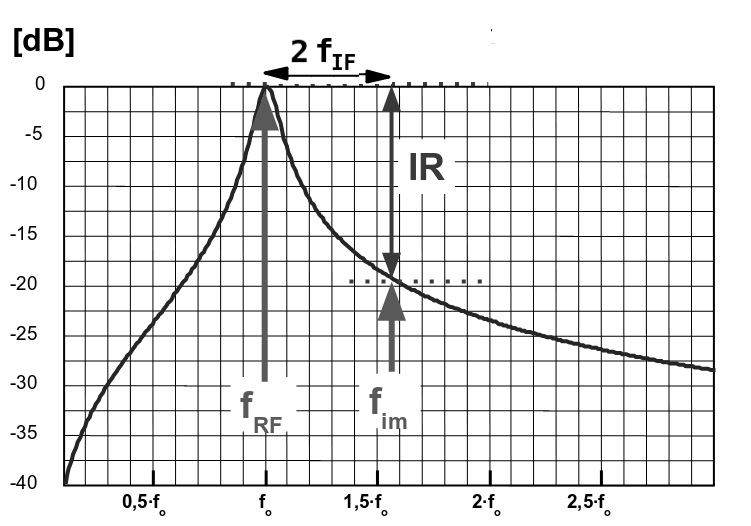
</div>


#### Sensibilidad del receptor

Para que el receptor sea capaz de recibir señales de pequeña amplitud, el aporte de ruido de este debe ser también pequeño, fundamentalmente debe tener una cifra de ruido baja, idealmente 1, para esto se suele emplear amplificadores de bajo ruido (LNA).

La fórmula de Friis se utiliza para calcular el factor de ruido total de etapas en serie, cada una con su respectivas pérdidas o ganancias y su respectiva factor de ruido. El factor de ruido total puede ser utilizado posteriormente para calcular la cifra de ruido total. El factor de ruido total se calcula mediante la siguiente fórmula:
$$F_{total} = F_1 + \frac{F_2-1}{G_1} + \frac{F_3-1}{G_1 G_2} + \frac{F_4-1}{G_1 G_2 G_3} + ... + \frac{F_n - 1}{G_1 G_2 ... G_{n-1}}$$

donde $F_n$ y $G_n$ son el factor de ruido y la ganancia en potencia disponible, respectivamente, de la enésima etapa. 


$$F_{receptor} = F_{LNA} + \frac{(F_{resto}-1)}{G_{LNA}}$$

donde $F_{resto}$ es el factor de ruido total de las etapas subsecuentes. De acuerdo a la ecuación, la cifra de ruido total, $F_{receptor}$, es dominada por la cifra de ruido del amplificador de bajo ruido, $F_{LNA}$, si la ganancia es lo suficientemente alta.

##### Ejemplo de receptor de conversión simple

Receptor de radiodifusión en FM (VHF, modulación en FM de banda ancha) con sintonía sintetizada con PLL:


$$f_{RF_{min}} = 87,5 MHz$$
$$f_{RF_{max}} = 108 MHz$$

$$f_{IF_{1}} = 10,7 MHz$$
El filtros realizado con filtro ceramico.


$$\Delta f_{IF_{2}} = 250 kHz$$


$$f_{OL_{1min}} = 98,2 MHz$$
$$f_{OL_{1max}} = 118,7 MHz$$


<div>
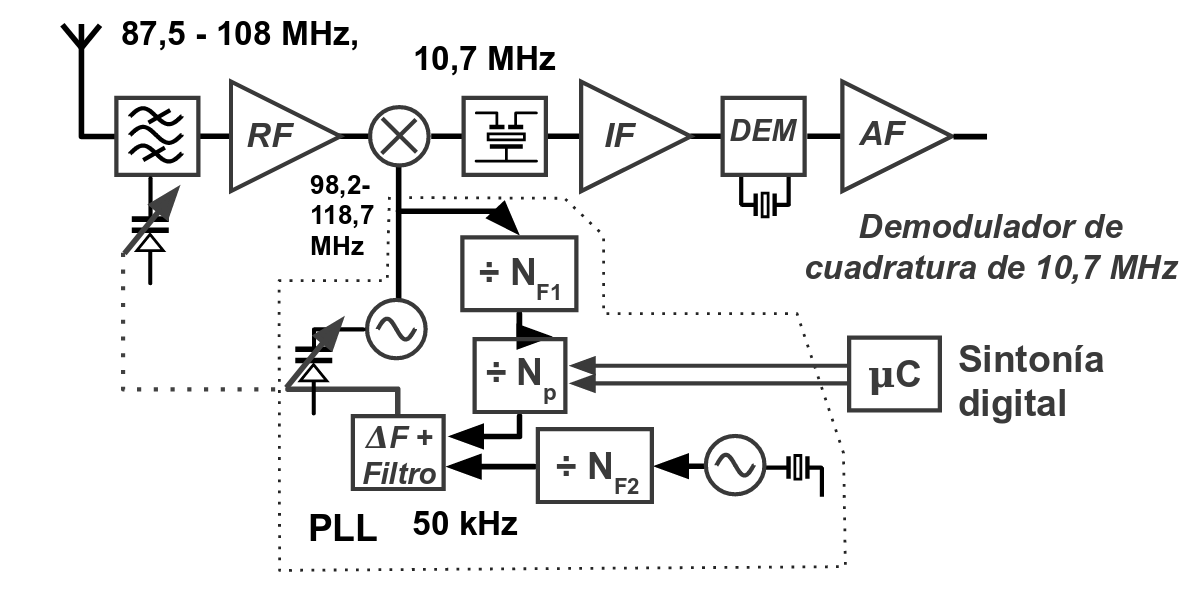
</div>

Ejemplo de circuito integrado super-heterodino de simple conversión: MAX1471.

### Super-heterodino de doble conversión. 

En el receptor de simple conversión, la selectividad del receptor está fijada por la del filtro de IF. Si aumenta $f_{IF}$ aumenta su ancho de banda (para igual Q) y, por tanto, disminuye la selectividad del receptor. Para solucionar este problema hay dos soluciones posibles:
    
    Usar filtros de más calidad (filtros cerámicos de alta calidad o filtros de cristal de cuarzo en vez de cerámicos).
 
    Usar una estructura de conversión múltiple (doble o triple) como el superheterodino de doble conversión.


<div>
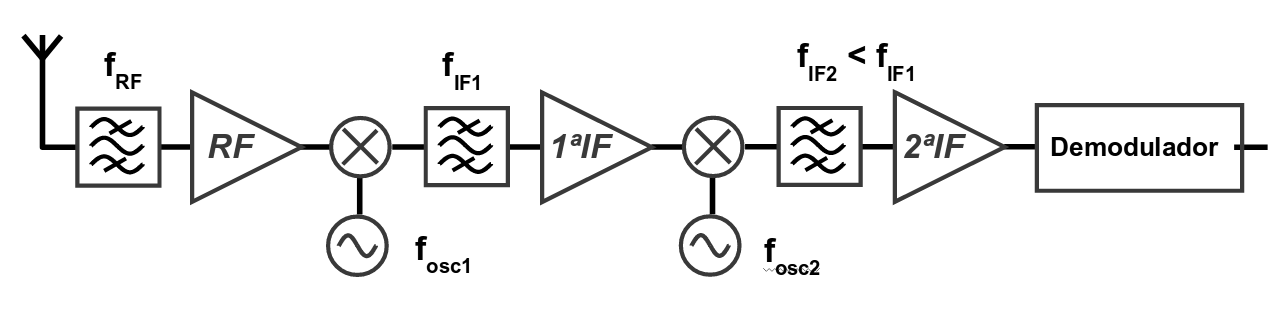
</div>

Dos frecuencias intermedias: 
    
La primera frecuencia intermedia, $f_{IF_1}$, se elige relativamente alta para conseguir buen rechazo a la frecuencia imagen.
La segunda frecuencia intermedia, $f_{IF_2}$, se elige relativamente baja para obtener una buena selectividad. 

#### Primer oscilador variable y primera IF constante


<div>
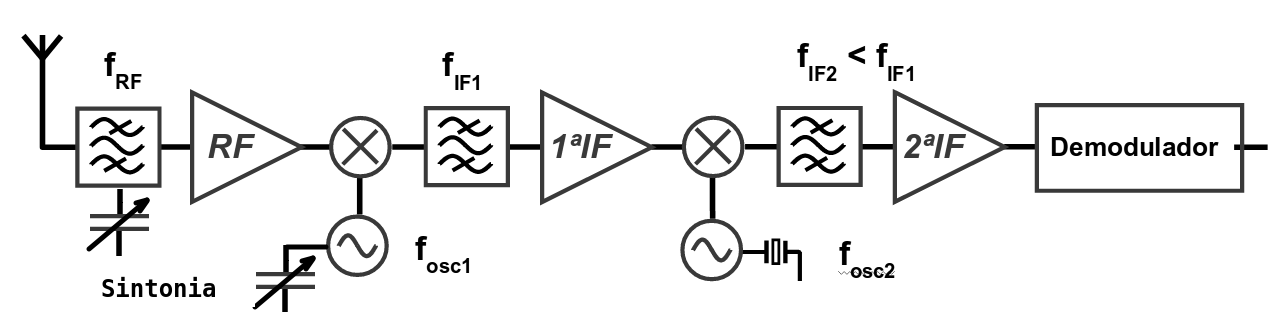
</div>

Mejor solución si el margen de variación de $f_{RF}$ es grande.
El oscilador de más alta frecuencia es el variable, esto podria tener posibles problemas de estabilidad térmica. La solución es usar PLLs o DDSs.


####  Primer oscilador constante y primera IF variable:


<div>
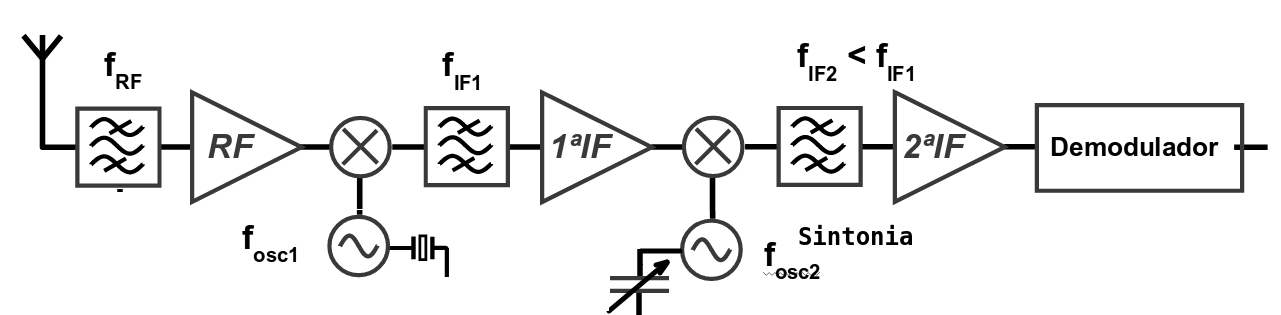
</div>

El oscilador de más alta frecuencia es de frecuencia fija (mejor desde el punto de vista de la estabilidad térmica).
Solución sólo adecuada si el margen de variación de $f_{RF}$ es pequeño. En caso contrario, existen problemas con el ruido y con el margen dinámico, ya que toda la banda a recibir es procesada por los amplificadores de RF y 1 IF, que deben ser de banda ancha. 


#### Receptor de radioaficionado de la banda de 2 m (VHF, modulación en FM de banda estrecha): 

$$f_{RF_{min}} = 144 MHz$$
$$f_{RF_{max}} = 146 MHz$$

$$f_{IF_{1}} = 10,7 MHz$$
$$f_{IF_{2}} = 455  kHz$$
Ambos filtros para las etapas intermedias realizados con filtros ceramicos.


$$\Delta f_{IF_{2}} = 15  kHz$$


$$f_{OL_{1min}} = 154,7 MHz$$
$$f_{OL_{1max}} = 156,7 MHz$$
Se sintoniza empleando un PLL (phase locked loop).

$$f_{OL_{2}} = 10,245 MHz$$



<div>
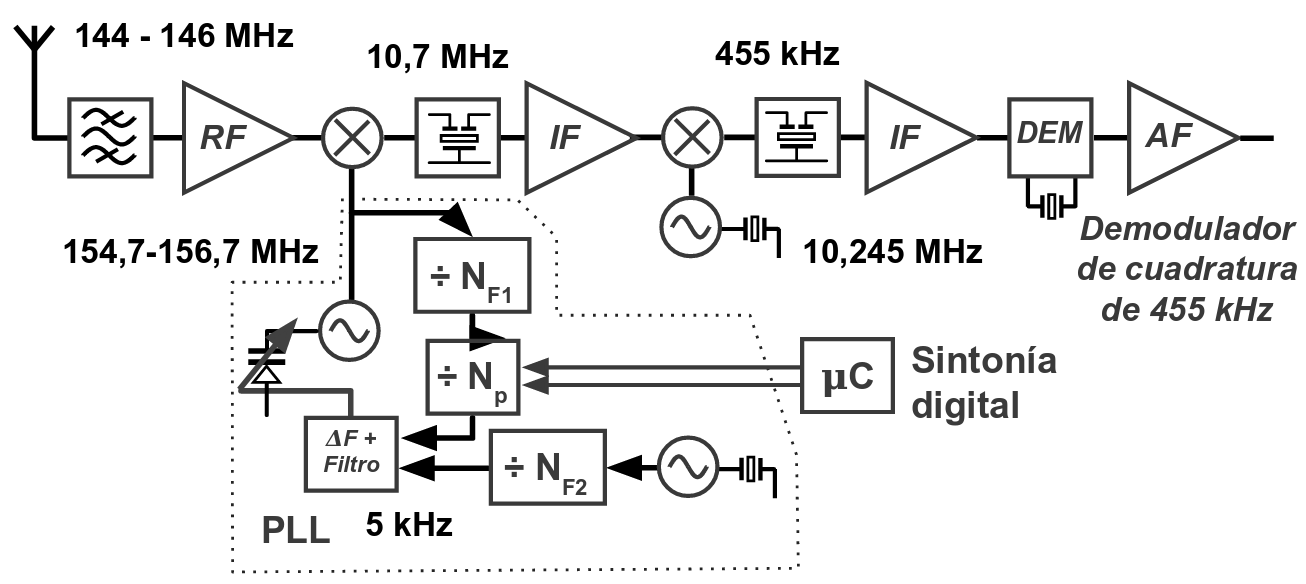
</div>


Ejemplo de CI para receptor de doble conversión

####  Receptor con rechazo de banda imagen por estructura I/Q
Otra manera de mejorar el rechazo de frecuencia imagen es emplear un receptor con rechazo de banda imagen por estructura I/Q. 
Ejemplo de este circuito es el integrado MAX2440.



<div>
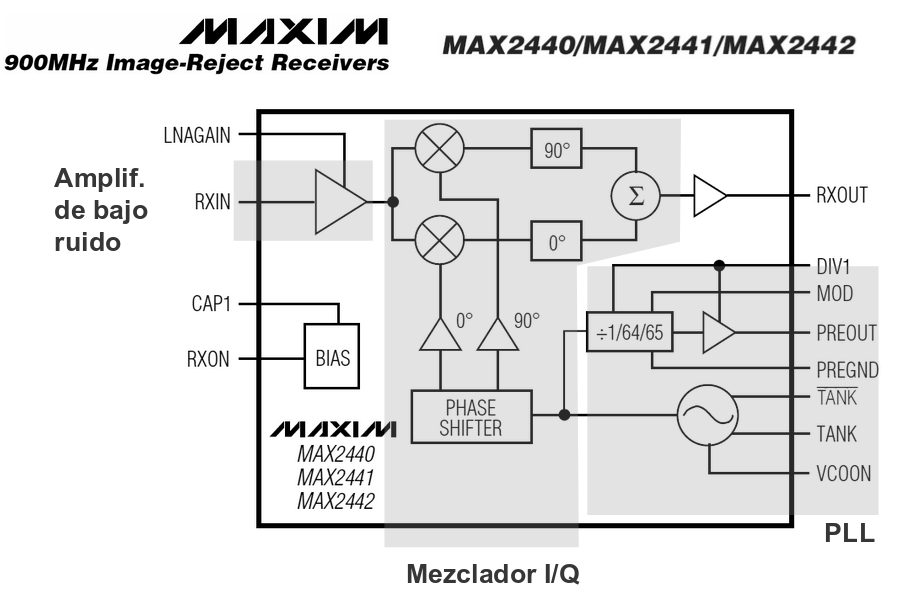
</div>


Los CI de receptor frontal altamente integrados MAX2440 proporcionan la solución de menor costo para teléfonos inalámbricos y radios de banda ISM que operan en la banda de 900MHz. Todos los dispositivos incorporan mezcladores de rechazo de imagen para reducir el costo del filtro. 
Funcionan con una fuente de alimentación de + 2.7V a + 4.8V, lo que permite la conexión directa a una pila de batería de 3 celdas. La entrada presenta un LNA de ganancia ajustable y un convertidor descendente de rechazo de imagen con supresión de imágenes de $35dB$. Estas características producen una excelente figura combinada de ruido del convertidor descendente ($4dB$) y alta linealidad con un punto de intercepción de tercer orden de entrada (IP3) de hasta $+2dBm$. Todos los dispositivos incluyen un oscilador local (LO) en el chip, que requiere solo un LC externo sintonizador de varactor Tanque para la operación. Es compatibles con los esquemas de modulación comúnmente utilizados como FSK, BPSK y QPSK, así como con el salto de frecuencia y los sistemas de espectro de dispersión de secuencia directa. 







